# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**1. n_estimators**:The number of trees in the forest. Default value is 100. The larger the better, but also results in an increased computational cost. Moreover, performance would stop optimizing beyond a critical number of trees.

**2. max_depth**: The maximum depth of the tree. By default is None. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. If max_depth is set too high, then it may overfit the training data. If it is too low, it may underfit.

**3. max_features**: The size of the random subsets of features to consider when splitting a node. Increasing max_features will improve the performance of the model and the computation cost. On the other hand, the lower, the greater the increase in bias, but also the greater the increase in the diversity among individual trees. In general, it should be set to a value that is smaller than the total number of features,like sqrt(n_features).

**4. bootstrap**: Whether bootstrap samples are used when building trees. It refers to randomly sample the dataset with the same size as the original dataset with replacement. It is set to True by default, and the accuracy can then be estimated on the out-of-bag samples. If False, the whole dataset is used and we only have the random feature selection for randomness. Thus, the trees will be similar.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**max_features should be set to n_features and bootstrap should be set to False.**

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets

In [25]:
digits=datasets.load_digits()
X=digits.data
y=digits.target
pca = PCA()
lda = LDA()
tsne = TSNE()
umap = umap.UMAP()

In [13]:
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
standardScaler.fit(X)
X_std=standardScaler.transform(X)

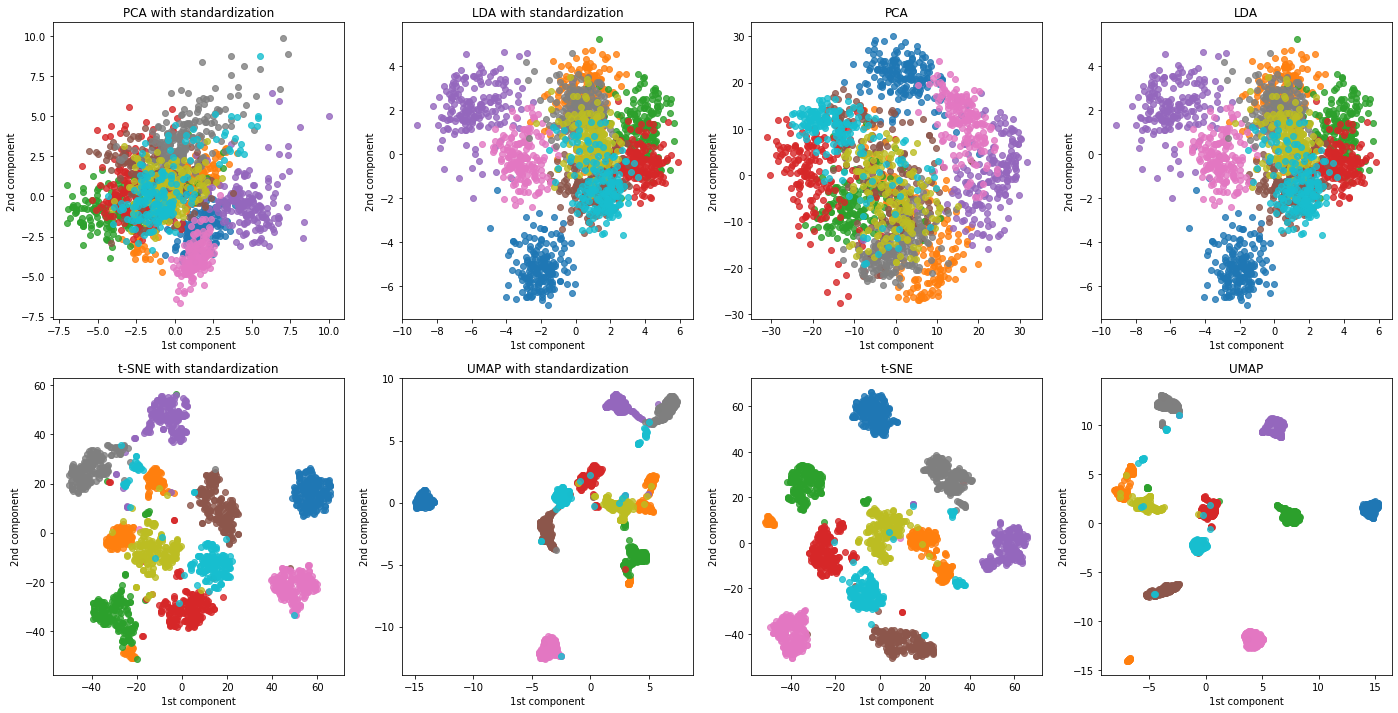

In [19]:
# digits
standardScaler=StandardScaler()
standardScaler.fit(X)
X_std=standardScaler.transform(X)
fig = plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
pca.fit(X_std)
X_reduction=pca.transform(X_std)
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('PCA with standardization')
plt.subplot(2,4,2)
lda.fit(X_std,y)
X_reduction_lda=lda.transform(X_std)
for i in range(10):
    plt.scatter(X_reduction_lda[y==i,0],X_reduction_lda[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('LDA with standardization')

plt.subplot(2,4,3)
pca.fit(X)
X_reduction=pca.transform(X)
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('PCA')
plt.subplot(2,4,4)
lda.fit(X,y)
X_reduction_lda=lda.transform(X)
for i in range(10):
    plt.scatter(X_reduction_lda[y==i,0],X_reduction_lda[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('LDA')

plt.subplot(2,4,5)
X_reduction_tsne=tsne.fit_transform(X_std)
for i in range(10):
    plt.scatter(X_reduction_tsne[y==i,0],X_reduction_tsne[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('t-SNE with standardization')
plt.subplot(2,4,6)
X_reductio_umap=umap.fit_transform(X_std)
for i in range(10):
    plt.scatter(X_reductio_umap[y==i,0],X_reductio_umap[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('UMAP with standardization')
plt.subplot(2,4,7)
X_reduction_tsne=tsne.fit_transform(X)
for i in range(10):
    plt.scatter(X_reduction_tsne[y==i,0],X_reduction_tsne[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('t-SNE')
plt.subplot(2,4,8)
X_reductio_umap=umap.fit_transform(X)
for i in range(10):
    plt.scatter(X_reductio_umap[y==i,0],X_reductio_umap[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('UMAP')
plt.show()

In [26]:
X.shape

(1797, 64)

In [22]:
wine=datasets.load_wine()
X=wine.data
y=wine.target

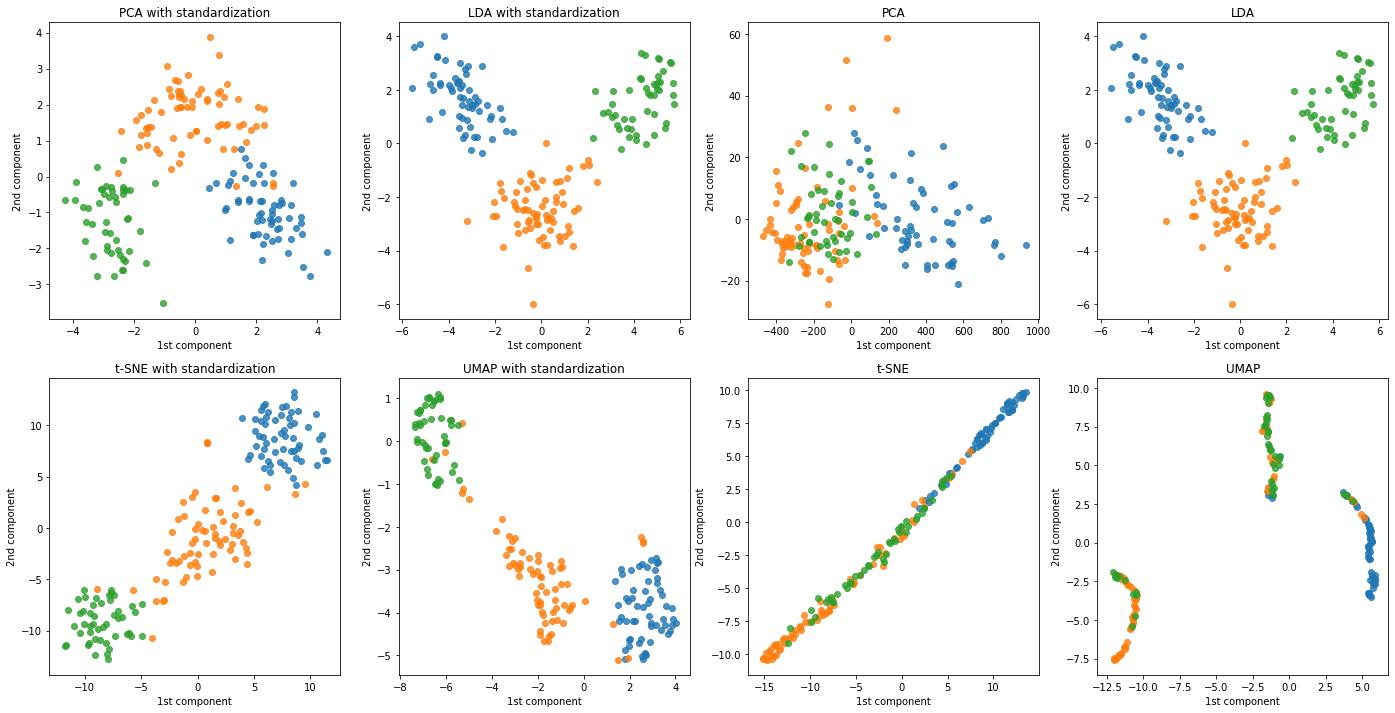

In [21]:
# wine
standardScaler=StandardScaler()
standardScaler.fit(X)
X_std=standardScaler.transform(X)
fig = plt.figure(figsize=(24,12))
plt.subplot(2,4,1)
pca.fit(X_std)
X_reduction=pca.transform(X_std)
for i in range(3):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('PCA with standardization')
plt.subplot(2,4,2)
lda.fit(X_std,y)
X_reduction_lda=lda.transform(X_std)
for i in range(3):
    plt.scatter(X_reduction_lda[y==i,0],X_reduction_lda[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('LDA with standardization')

plt.subplot(2,4,3)
pca.fit(X)
X_reduction=pca.transform(X)
for i in range(3):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('PCA')
plt.subplot(2,4,4)
lda.fit(X,y)
X_reduction_lda=lda.transform(X)
for i in range(10):
    plt.scatter(X_reduction_lda[y==i,0],X_reduction_lda[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('LDA')

plt.subplot(2,4,5)
X_reduction_tsne=tsne.fit_transform(X_std)
for i in range(3):
    plt.scatter(X_reduction_tsne[y==i,0],X_reduction_tsne[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('t-SNE with standardization')
plt.subplot(2,4,6)
X_reductio_umap=umap.fit_transform(X_std)
for i in range(3):
    plt.scatter(X_reductio_umap[y==i,0],X_reductio_umap[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('UMAP with standardization')
plt.subplot(2,4,7)
X_reduction_tsne=tsne.fit_transform(X)
for i in range(3):
    plt.scatter(X_reduction_tsne[y==i,0],X_reduction_tsne[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('t-SNE')
plt.subplot(2,4,8)
X_reductio_umap=umap.fit_transform(X)
for i in range(3):
    plt.scatter(X_reductio_umap[y==i,0],X_reductio_umap[y==i,1],alpha=0.8)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('UMAP')
plt.show()

**For wine dataset, these models except LDA perform poorly without standardization, especially t-SNE and UMAP these two nonlinear methods. For LDA, eigenvalues are excactly the same whether we scaled our data or not, so it wont be necessary to standardize. For digits dataset, standardization also wont be a problem, because data in this dataset are integer pixels in the range 0..16. Thus although the data are not standardized, they are measured in the same scale as a whole. In general, LDA works better as a classifier compared to PCA. For higher-dimension data, we can rarely ﬁnd a linear projection which gives us a sense of distribution, thus the non-linear methods t-SNE and UMAP are applicable.**

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**According to Athey and Imbens (2015), honesty means that a model does not use the same information for selecting the model structure as for estimataion given a model structure. 
If honest, bias will be eliminated when estimate treatment effect. In practice of the DT algorithm, honest is achieved by spliting the training dataset into two parts, that is, a training set and an estimation set. The training set is for building the tree. The estimation set is then used to estimate the treatment effects within leaves of the tree.**
